# Food Distribution Optimization📝

![Banner](./assets/food.png)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->
Food Distribution Optimization

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->
  1. Which areas within the United States suffer the highest food scarcity and/or food waste? (This can include restaurants and grocery chains, as well as communities, charities, and counties.)

  2. What is the most efficient way to transport excess from high waste areas to communities and charities with high food insecurity? (This can include routes or types of energy/vehicles.)
  
  3. How would these changes impact local, state, and federal economies and surrounding environments (in the sense that the benefits of redistribution outweigh the environmental/cost of drawbacks)?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->
Answers to these questions would first be maps of hot spots where there is high food insecurity, as well as maps showcasing areas of high food waste, preferably outlined as counties in various shades of a color depending on how bad the area either needs food or needs redistribution. The map would show restaurants, grocery chains, food banks, or communities that fit the above description, and main/cross country or cross county/state roads would also be labeled to show the best route to optimize food redistribution. AI could generate best routes, or a network map could be utilized to showcase this. There could also be supply and demand graphs for the main areas, as decided based on these maps, where a list of the most benefiting providers and receivers could be focused on for redistribution. As for the final question, line graphs (or bar graphs) could showcase carbon emissions from the use of transportation to redistribute food throughout the country to show the environmental impact, and a metric of cost savings from the theoretical cost of having this food waste go to landfills (where it instead is transported to other communities and food banks) would show the economic impact.


## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->
Much of the data would have to come from the USDA or food-related nonprofits, since those are the organizations who conduct this kind of research. 
  1. The USDA has a food access map chart that shows how food is scattered across the country, and this will show the areas with higher food insecurity to work with. It's an interactive map that can be used to pinpoint and then rank areas of high food insecurity and waste for redistribution.

  2. The EPA provides data for methods ranking the limitation of food waste, and this includes the impact of taking food away from landfills as files. In addition, ReFED has an insights engine that contains an impact calculator to download theoretical database data. This will provide information on the benefits and costs of redistributing food from landfills to food banks.
  
  3. The USDA also provides an agricultural marketing service that tracks the movement of food products through its supply chain journey. This data can be downloaded as datasets, showing truck rates and availability as volumes and as a use index. This will show routes and emissions produced by current methods and where exactly production is going.

  https://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/interactive-charts-and-highlights/
  (foodsecurity_datafile.xlsx)

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->
To answer the project question, I will be analyzing datasets with information detailing food distribution and insecurity within the United States of America. This will include data on food insecurity among individuals of various residencies, races and ethnicities, and employment statuses. State food insecurity prevalence will also be compared to find trends among population or land sizes and proximity to farming regions to find the best suitable conclusion as to solving the nation's food crisis and serving under-receiving communities. FDA maps will also be analyzed to further visualize these farming regions and established food distribution routes to best decrease food waste and increase food insecurity by rerouting and redistributing food resources to routes that need them most, all while limiting transportation and landfill costs.

## Exploratory Data Analysis (EDA)

### Statistical Summary and Analysis

For the purpose of this project, data from prior years (before 2023) will be primarily ignored for the time being. This is because the most recent data is the most relevant. However, it might be beneficial in the future, when using this dataset to set up predictions and forecast future food insecurity prevalence across the United States, to refer back to the year 2019, using the last five years of available data. That being said, for the time being, all other than the data collected from the year 2023 will be ignored.

From the year 2023, food insecurity across the United States was roughly 12.2%. On a state-level, food insecurity prevalence fluctuated within the range 7.4 and 18.9%, with New Hampshire having the lowest and Arizona having the highest portion of its population struggling with food security. The margin of error for this data is not high enough to be considered relevant. There does not seem to be a correlation between percentage of the population with food insecurity and size of the state, nor size of the population, as Vermont and Minnesota had nearly equivalent food insecurity prevalence in the year 2023.

Deeper analysis into the area of residence shows that there seems to be no correlation between population with food insecurities and area of residence, such as whether they live in the inner or outer city. There is a slightly higher percentage of the population suffering from food insecurity among those who live outside the metropolitan area and those within principal cities; however, this discrepancy is roughly 4% and is deemed unimportant for further analysis.

However, when analyzing food insecurity by race and ethnicity, it can be noted that, based on the nation-wide average, white non-Hispanic individuals are 13% more food secure than their black and Hispanic counterparts. Less than 10% of white non-Hispanic individuals are food insecure in the United States whereas 23.3% of blacks and 21.9% of Hispanics suffer from food insecurities within their communities. There does seem to be correlation between race/ethnicity and food insecurity, and while it would be interesting to see how race/ethnicity and area of residence coincide, there is no data for this, and assumptions cannot be made from previous data analysis because there does not seem to be a major correlation between food insecurity and area of residence, outside any margin of error, to make reasonable conclusions.

Lastly, regarding employment, the lowest food insecurity prevalence (by percentage) is among retired individuals at 9.1%. This is remarkably low compared to part-time, unemployed, and disabled individuals, which have food insecurities of 33.4, 38.5, and 41.9%, respectively. Disabled individuals have the highest food insecurity across the nation. There does seem to be correlation with employment status and food insecurity, as those with higher income (or some income at all) have lower food insecurity. The interesting outlier is retired individuals, but could be because they have financial assistance from other income sources such as pensions, social security, or other retirement plans. As for education, there is definite correlation between level of education and food insecurity prevalence. Those with a college degree have a 6.6% food insecurity prevalence whereas those with less than high school have a significantly higher prevalence at 30.5%. It is important to mention that the food insecurity prevalence steadily declines the higher the level of education, as seen in the 20.9% prevalence among high school graduates and 17.3% prevalence among those with some college background. 


### Data Issues

There comes the issue that is brought with ignoring other values. Not including non-2023 data may skew with the visualization or interpretation of the data. For example, New Hampshire's 2023 data shows the state as having the lowest food insecurity prevalence; however, historical data shows that this value has been steadily increasing since 2018, which may place a red flag on the state. One year's data will not show this historical data. Data cleaning will take care of any null and repetitive values. In addition, all other years, aside from the year 2023, were filtered out within the dataset. Any relevant data, such as food security by state, by education, employment, and disability, and by race/ethnicity and area of residence, were converted into bar or line graphs to properly visualize any relationships between level of food security (or insecurity) and the independent variable as deemed appropriate. Most data types were numerical, except for the categories themselves.

## Machine Learning

### What types of machine learning will you use in your project?
Machine learning used as part of this project include clustering (unsupervised learning) and regression (supervised learning) techniques. Under clustering, it would be beneficial to group together similar demographics, such as race/ethnicity, area of residence, and state of residence, to better reroute food resources to communities who need them more and away from communities with higher levels of waste. For example, in the year 2023, residents of the state of Arizona had the highest level of food insecurity. It would be beneficial to redistribute resources from, for example, New Hampshire, which had the lowest food insecurity prevalence in the same year. As for regression, and while I did not necessarily do this as part of the current visualizations, it would be relevant to recognize historical data and predict food insecurity levels for the next year with the intention to act proactively rather than reactively, similar to how companies predict product demand and revenue sales.

### What issues do you see in making that happen?
Issues in making that happen could be in data simply not being available or not having been collected for the special circumstance, or the margin of error being so high that the data becomes somewhat irrelevant in decision making. If data is not collected frequently or as comprehensibly as it ideally would be, there might be more gaps in the data and then in the analysis itself. Not all regression analyses are correct, either, since they focus on past trends to predict future activities. There is no guarantee for accuracy, and natural disasters or other anomalies could completely mess with the accuracy of any forecasts.

### What challenges will you potentially face?
Challenges I could potentially face are in these issues, where I might not be able to get the data I'm hoping for. Or the data I find is non-current or incomplete. The data might also go against my entire project goal, where there is no correlation between certain categories or demographic variables, if it's there at all. The data might also show that it's more expensive or logistically challenging to reroute food resources, which makes that part of the project obsolete.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

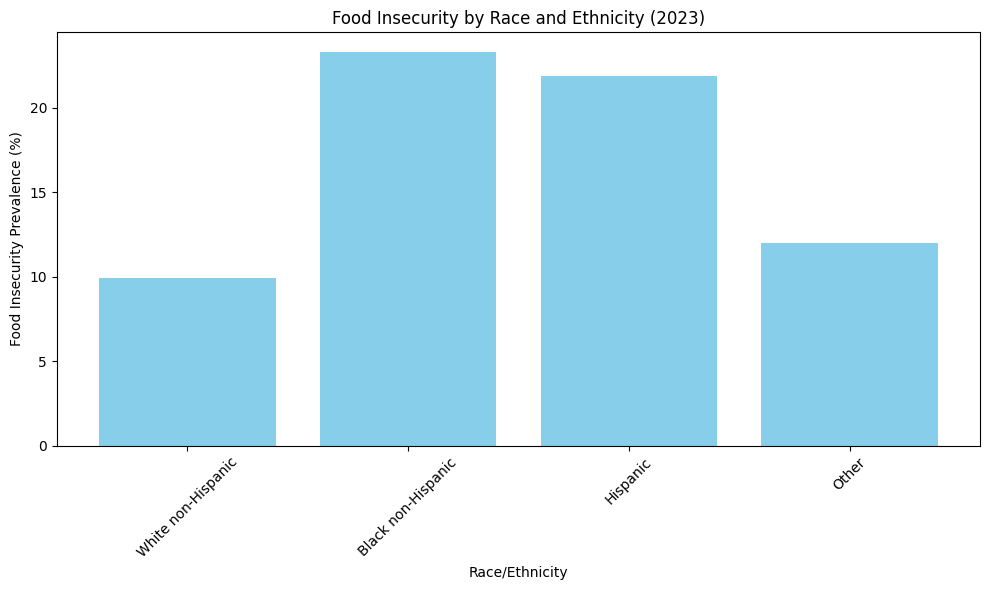

In [67]:
file_url = 'https://github.com/IT4063C-Fall24/final-project-Jsheppard99/raw/main/assets/foodsecurity_datafile.xlsx'
data = pd.read_excel(file_url, sheet_name='Food security, all households')

# Define the desired category for filtering
desired_category = 'Race/ethnicity of households'

# Filter the data to include only rows for the year 2023 and the desired category
data_2023 = data[(data['Year'] == 2023) & (data['Category'] == desired_category)]

# Clean the race/ethnicity data by removing rows with missing values
race_ethnicity = data_2023['Subcategory'].dropna()

# Clean the food insecurity data by removing rows with missing values
food_insecurity = data_2023['Food insecure-percent'].dropna()

# Create a new DataFrame `data_clean` by combining the cleaned race/ethnicity and food insecurity data
data_clean = pd.DataFrame({'Race/Ethnicity': race_ethnicity, 'Food Insecurity': food_insecurity}).dropna()

# Create a plot to visualize the food insecurity by race/ethnicity
plt.figure(figsize=(10, 6))

plt.bar(data_clean['Race/Ethnicity'], data_clean['Food Insecurity'], color='skyblue')
plt.xlabel("Race/Ethnicity")  
plt.ylabel("Food Insecurity Prevalence (%)")  
plt.title("Food Insecurity by Race and Ethnicity (2023)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Through this graph we can identify which races are most affected by food insecurity and allocate more resources to those communities.

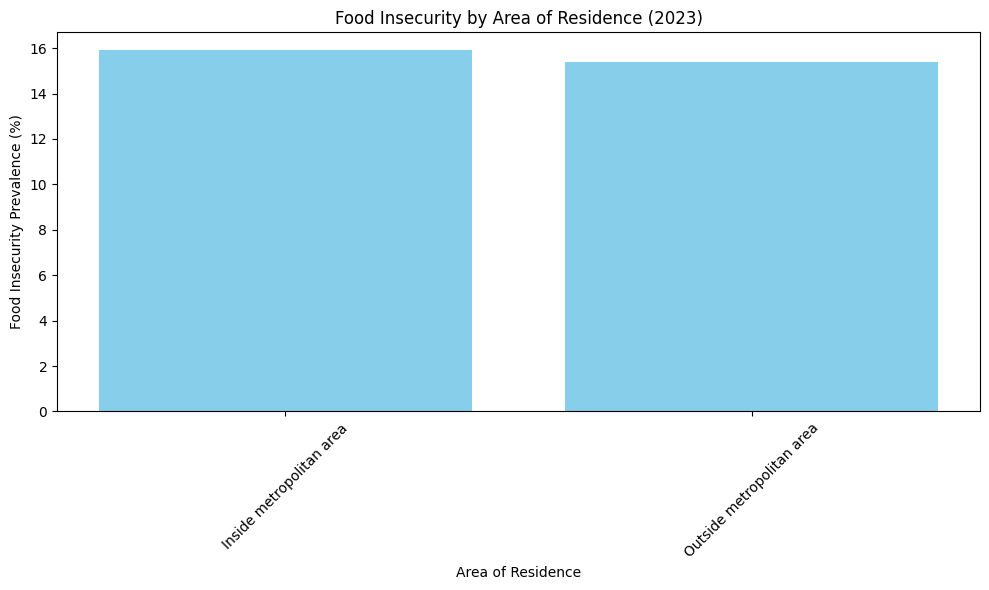

In [66]:
file_url = 'https://github.com/IT4063C-Fall24/final-project-Jsheppard99/raw/main/assets/foodsecurity_datafile.xlsx'
data = pd.read_excel(file_url, sheet_name='Food security, all households')

# Define the desired category to filter by
desired_category = 'Area of residence'

# Filter the data for the year 2023 and the selected category ('Area of residence')
data_2023 = data[(data['Year'] == 2023) & (data['Category'] == desired_category)]

# Clean the 'Subcategory' column (which contains area of residence information)
area_of_residence = data_2023['Subcategory'].dropna()

# Clean the 'Food insecure-percent' column
food_insecurity = data_2023['Food insecure-percent'].dropna()

# Create a new DataFrame with the cleaned data
data_clean = pd.DataFrame({'Area of Residence': area_of_residence, 'Food Insecurity': food_insecurity}).dropna()

plt.figure(figsize=(10, 6))
plt.bar(data_clean['Area of Residence'], data_clean['Food Insecurity'], color='skyblue')
plt.xlabel("Area of Residence")
plt.ylabel("Food Insecurity Prevalence (%)")
plt.title("Food Insecurity by Area of Residence (2023)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# We can use this graph to compare inner city food insecurities to those who live 
# outside the downtown districts to decide whether residence in relation to the city is a factor in food scarcity.

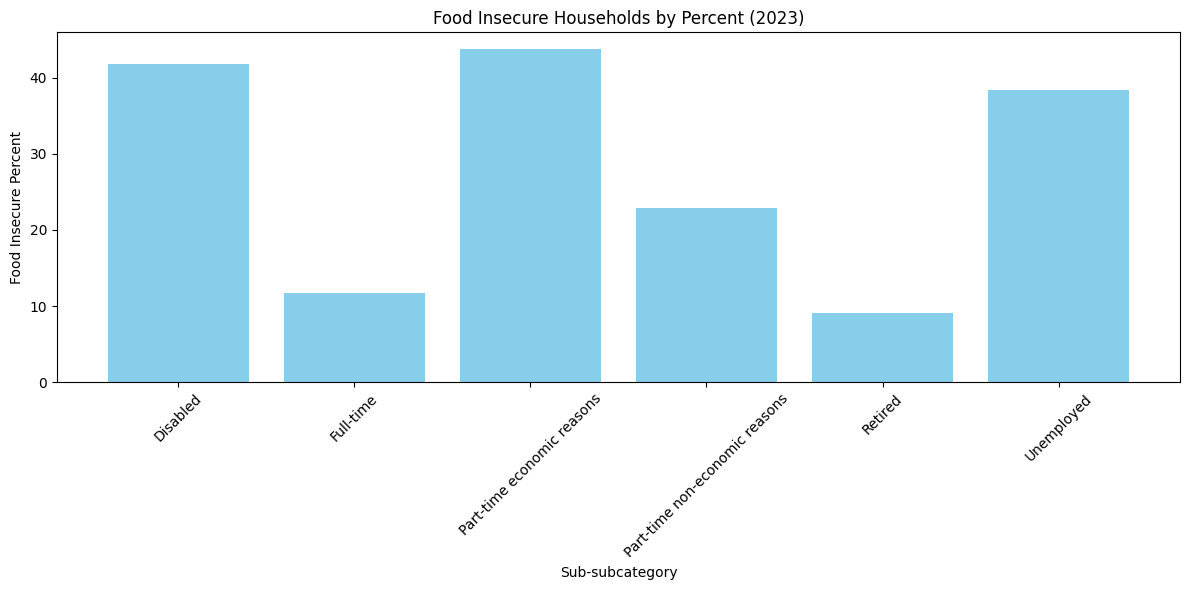

In [65]:
file_url = 'https://github.com/IT4063C-Fall24/final-project-Jsheppard99/raw/main/assets/foodsecurity_datafile.xlsx'
data = pd.read_excel(file_url, sheet_name='Educ, emp, disability')

# Make an explicit copy to avoid SettingWithCopyWarning
filtered_data = data[data['Year'] == 2023][['Subcategory', 'Sub-subcategory', 'Food insecure-percent']].copy()

# Filter by 'Sub-subcategory' for Employment
filtered_data = filtered_data[filtered_data['Sub-subcategory'].isin(['Full-time', 'Retired', 'Part-time economic reasons', 'Part-time non-economic reasons', 'Unemployed', 'Disabled'])]

# Handle missing values - Drop rows with NaN values in the relevant columns
filtered_data.dropna(subset=['Subcategory', 'Sub-subcategory', 'Food insecure-percent'], inplace=True)

# Convert 'Food insecure-percent' to numeric values (in case it's stored as strings)
filtered_data['Food insecure-percent'] = pd.to_numeric(filtered_data['Food insecure-percent'], errors='coerce')

# Drop any remaining rows with NaN values in 'Food insecure-percent' after conversion
filtered_data.dropna(subset=['Food insecure-percent'], inplace=True)

# Group data by 'Subcategory' and 'Sub-subcategory', and aggregate by summing the 'Food insecure-percent' column
grouped_data = filtered_data.groupby(['Subcategory', 'Sub-subcategory'])['Food insecure-percent'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(grouped_data['Sub-subcategory'], grouped_data['Food insecure-percent'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Sub-subcategory')
plt.ylabel('Food Insecure Percent')
plt.title('Food Insecure Households by Percent (2023)')
plt.tight_layout()

plt.show()

# We can use this bar graph to see whether employment status 
# is a factor in those struggling with food insecurity, then reroute food to areas with a high concentration of these social groups, such as retirement communities.

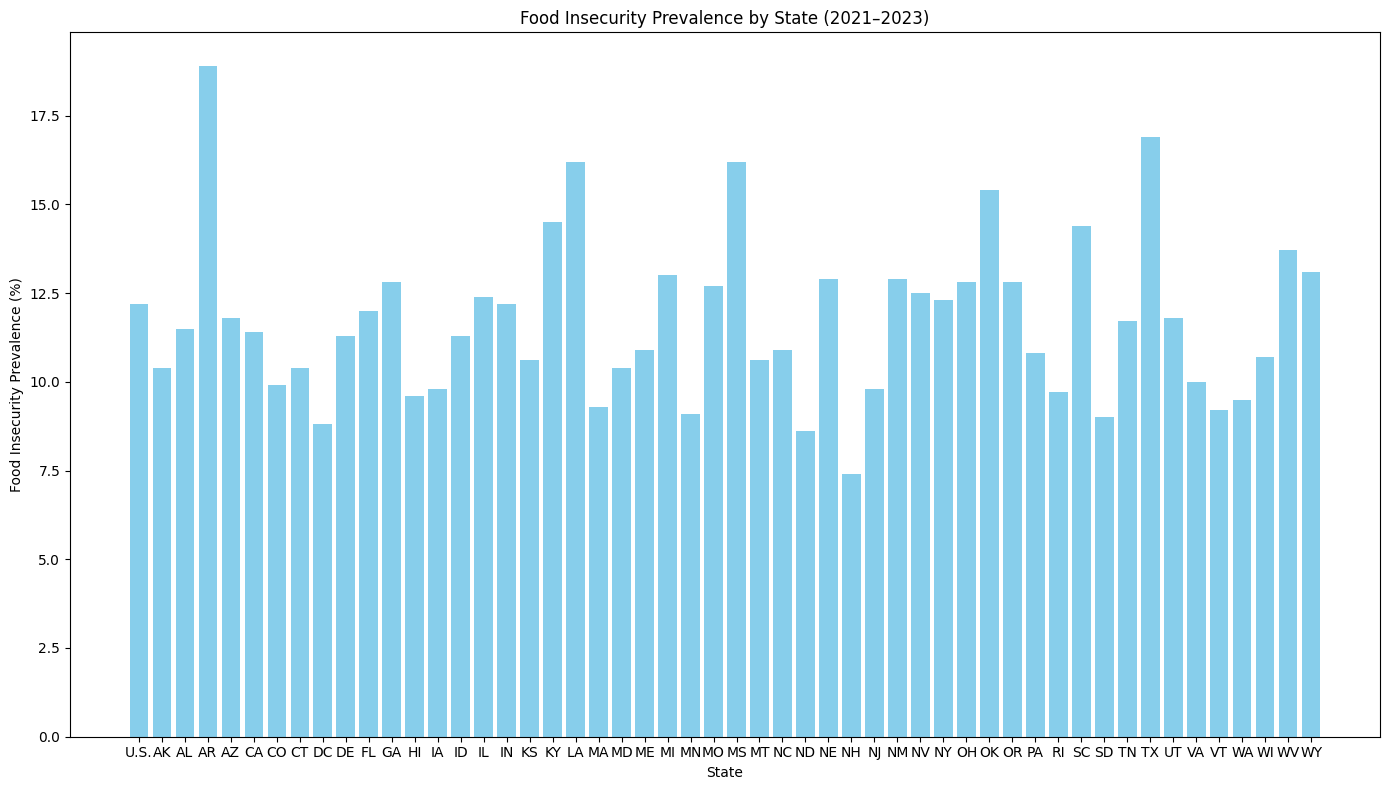

In [64]:
file_url = 'https://github.com/IT4063C-Fall24/final-project-Jsheppard99/raw/main/assets/foodsecurity_datafile.xlsx'
state_data = pd.read_excel(file_url, sheet_name='Food security by State')

# Filter for the most recent year range "2021–2023" and exclude the "U.S. total"
most_recent_data = state_data[(state_data['Year'] == '2021–2023') & (state_data['State'] != 'U.S. total')]

# Replace missing or null values with a placeholder, e.g., 'Unknown'
state_data['State'].fillna('Unknown', inplace=True)

# Extract data for plotting
states = most_recent_data['State']
food_insecurity = most_recent_data['Food insecurity prevalence']

# Plotting the bar graph
plt.figure(figsize=(14, 8))
plt.bar(states, food_insecurity, color='skyblue')
plt.xlabel("State")
plt.ylabel("Food Insecurity Prevalence (%)")
plt.title("Food Insecurity Prevalence by State (2021–2023)")
plt.tight_layout()
plt.show()

# This organizes food insecurity by state so we can see which states suffer the most and appropriately reroute potential 
# food waste to areas in need before it has the chance to be thrown out.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [8]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 6193 bytes to source.py
